In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

##Data Preparation and Cleaning

In [ ]:

# Load your DataFrame
df = pd.read_csv('/content/Untitled spreadsheet - Sheet1.csv')

df = pd.DataFrame(df)

# Remove "JFM" and keep only the year, handle NaN values by filling them with a placeholder or dropping them
df['Season'] = df['Season'].str.extract(r'(\d{4})').fillna(0).astype(int)  # Replace 0 with a placeholder if needed

# Remove "°C" and convert to float using pd.to_numeric
df['Anomaly (celsius)'] = pd.to_numeric(df['Anomaly (celsius)'].str.replace('°C', ''), errors='coerce')

print(df)

# Keep only rows up to index 896 (exclusive)
df = df.iloc[:896]

# Display the DataFrame to confirm the changes
print(df)
# Export the DataFrame to a CSV file
df.to_csv('/content/cleaned_data.csv', index=False)  # Set index=True if you need to keep the DataFrame index in the file
import pandas as pd

# Generate Year-Month format for the entire DataFrame
months = [f"{i:02d}" for i in range(1, 13)]  # List of month strings ['01', '02', ..., '12']

# Create YearMonth column
year_months = []
for year in df['Season'].unique():
    for month in months:
        year_months.append(f"{year}-{month}")

# Assign the YearMonth to the DataFrame based on the original number of rows
df['YearMonth'] = year_months[:len(df)]  # Ensure it matches the DataFrame length

# Drop the 'Month' column and the original 'Season' if needed
df = df.drop(columns=['Season'])

print(df)

# Convert 'YearMonth' to a datetime object, keeping only year and month
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m')

print(df)

# Set 'YearMonth' as the index
df.set_index('YearMonth', inplace=True)

# Rename the index to 'Time'
df.index.name = 'Time'

# Display the updated DataFrame
print(df)



# Check the index column
#print("Index column name:", df.index.name)
#print("Index values:")
#print(df.index)
#df.head()
#print(type(df))
#print(df.iloc[1])

     Season  Anomaly (celsius)
0      1950               -1.5
1      1950               -1.3
2      1950               -1.2
3      1950               -1.2
4      1950               -1.1
..      ...                ...
893    2024                0.2
894    2024                0.0
895    2024               -0.1
896       0                NaN
897       0                NaN

[898 rows x 2 columns]
     Season  Anomaly (celsius)
0      1950               -1.5
1      1950               -1.3
2      1950               -1.2
3      1950               -1.2
4      1950               -1.1
..      ...                ...
891    2024                0.7
892    2024                0.4
893    2024                0.2
894    2024                0.0
895    2024               -0.1

[896 rows x 2 columns]
     Anomaly (celsius) YearMonth
0                 -1.5   1950-01
1                 -1.3   1950-02
2                 -1.2   1950-03
3                 -1.2   1950-04
4                 -1.1   1950-05
..        

## Plotting Data

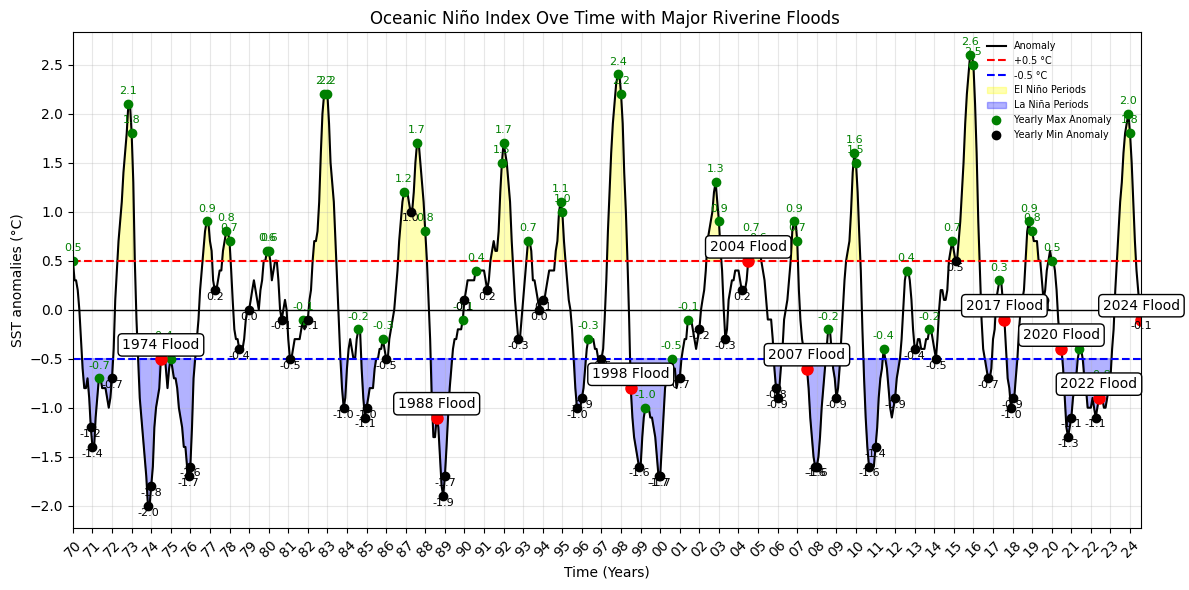

In [87]:
# Assuming the flood occurred in August 2024
flood_dates = ['1988-08', '1998-07', '2004-07', '2007-07', '2017-08', '2020-07', '2022-06', '2024-08', '1974-07']
flood_annotations = {
    '1988-08': '1988 Flood',
    '1998-07': '1998 Flood',
    '2004-07': '2004 Flood',
    '2007-07': '2007 Flood',
    '2017-08': '2017 Flood',
    '2020-07': '2020 Flood',
    '2022-06': '2022 Flood',
    '2024-08': '2024 Flood',
    '1974-07': '1974 Flood'
}

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_filtered_copy.index, df_filtered_copy['Anomaly (celsius)'], color='black', label='Anomaly')
plt.axhline(y=0.5, color='red', linestyle='--', label='+0.5 °C')
plt.axhline(y=-0.5, color='blue', linestyle='--', label='-0.5 °C')

# Mark El Niño periods
el_nino_mask = df_filtered_copy['Anomaly (celsius)'] > 0.5
plt.fill_between(df_filtered_copy.index, 0.5, df_filtered_copy['Anomaly (celsius)'], where=el_nino_mask,
                 color='yellow', alpha=0.3, label='El Niño Periods')

# Mark La Niña periods
la_nina_mask = df_filtered_copy['Anomaly (celsius)'] < -0.5
plt.fill_between(df_filtered_copy.index, -0.5, df_filtered_copy['Anomaly (celsius)'], where=la_nina_mask,
                 color='blue', alpha=0.3, label='La Niña Periods')

# Set x-limits to show from 1970 to the latest month
plt.xlim(pd.to_datetime('1970-01-01'), df_filtered_copy.index[-1])

# Set x-ticks to show each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Show every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y'))  # Show last two digits of year

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45)

# Set y-ticks at 0.5 degree intervals
y_min = df_filtered_copy['Anomaly (celsius)'].min()
y_max = df_filtered_copy['Anomaly (celsius)'].max()
plt.yticks(ticks=[i * 0.5 for i in range(int(y_min * 2), int(y_max * 2) + 1)])  # Y-axis ticks at 0.5 intervals

# Group by year and find max and min values for each year
yearly_max = df_filtered_copy.loc[df_filtered_copy.groupby('Year')['Anomaly (celsius)'].idxmax()]
yearly_min = df_filtered_copy.loc[df_filtered_copy.groupby('Year')['Anomaly (celsius)'].idxmin()]

# Mark max and min points for each year
plt.plot(yearly_max.index, yearly_max['Anomaly (celsius)'], 'go', label='Yearly Max Anomaly')  # Green points for max
plt.plot(yearly_min.index, yearly_min['Anomaly (celsius)'], 'ko', label='Yearly Min Anomaly')  # Black points for min

# Annotate max and min values for each year
for idx in yearly_max.index:
    plt.text(idx, yearly_max["Anomaly (celsius)"].loc[idx] + 0.1,
             f'{yearly_max["Anomaly (celsius)"].loc[idx]:.1f}',
             fontsize=8, color='green', ha='center')

for idx in yearly_min.index:
    plt.text(idx, yearly_min["Anomaly (celsius)"].loc[idx] - 0.1,
             f'{yearly_min["Anomaly (celsius)"].loc[idx]:.1f}',
             fontsize=8, color='black', ha='center')  # Black for min values

# Mark the floods on the graph with specific annotations
for flood_date in flood_dates:
    if flood_date in df_filtered_copy.index.strftime('%Y-%m'):
        flood_point = df_filtered_copy.loc[flood_date].iloc[0]  # Get the first row if multiple rows match
        plt.plot(flood_point.name, flood_point['Anomaly (celsius)'], 'ro', markersize=8)  # Larger red points for floods
        plt.text(flood_point.name, flood_point['Anomaly (celsius)'] + 0.1,
                 flood_annotations[flood_date], fontsize=10, color='Black', ha='center',
                 bbox=dict(facecolor='white', alpha=1, boxstyle='round,pad=0.3'))  # Background box for text


# Add labels and adjust the legend
plt.title('Oceanic Niño Index Ove Time with Major Riverine Floods ')
plt.xlabel('Time (Years)')
plt.ylabel('SST anomalies (°C)')
plt.legend(loc='upper right', fontsize='x-small', frameon=False, bbox_to_anchor=(0.98, 1))  # Legend on the right
plt.grid(alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1, label='0°C')  # Purple line for 0°C
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()
